In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../datasets/wine.csv')

In [4]:
data.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
#colnames=['class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
#          'Flavanoids', 'Nonflavanoid_phenols', 
#          'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315', 'Proline']
#data.columns = colnames

In [5]:
data.to_csv('../datasets/wine2.csv')

## k means clustering is an unsupervised machine learning algorithm

Three key features of k-means that make it efficient are often regarded as its biggest drawbacks:

Euclidean distance is used as a metric and variance is used as a measure of cluster scatter.
The number of clusters k is an input parameter: an inappropriate choice of k may yield poor results. That is why, when performing k-means, it is important to run diagnostic checks for determining the number of clusters in the data set.
Convergence to a local minimum may produce counterintuitive ("wrong") results 

Source: https://en.wikipedia.org/wiki/K-means_clustering

## find the number of clusters using the elbow method

In [6]:
## scale the data

mms = MinMaxScaler()
data.loc[:, data.columns != 'class'] = mms.fit_transform(data.loc[:, data.columns != 'class'])

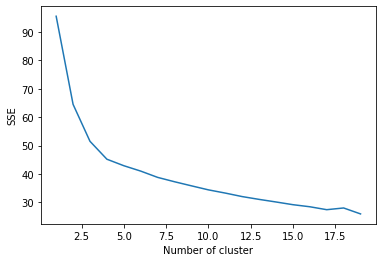

In [7]:

data_elb = data.loc[:, data.columns != 'class']

sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_elb)
    data_elb["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()